In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("Breast_cancer_dataset.csv")

In [3]:
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
dataset.shape

(569, 33)

In [5]:
dataset["Unnamed: 32"].isnull().sum()

569

In [6]:
dataset.drop(columns = "Unnamed: 32", inplace = True)

In [7]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
num_columns = []

for feature in dataset.columns:
    if dataset[feature].dtypes != 'O':
        num_columns.append(feature)

print(num_columns)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
print(len(num_columns))

31


In [12]:
Label = LabelEncoder()

In [13]:
dataset['diagnosis'] = Label.fit_transform(dataset['diagnosis'])

In [14]:
dataset['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [15]:
target = dataset['diagnosis']

In [16]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [17]:
plt.figure(figsize = (10,10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

id
8670         Axes(0.125,0.11;0.775x0.77)
8913         Axes(0.125,0.11;0.775x0.77)
8915         Axes(0.125,0.11;0.775x0.77)
9047         Axes(0.125,0.11;0.775x0.77)
85715        Axes(0.125,0.11;0.775x0.77)
                        ...             
911157302    Axes(0.125,0.11;0.775x0.77)
911296201    Axes(0.125,0.11;0.775x0.77)
911296202    Axes(0.125,0.11;0.775x0.77)
911320501    Axes(0.125,0.11;0.775x0.77)
911320502    Axes(0.125,0.11;0.775x0.77)
Name: diagnosis, Length: 569, dtype: object

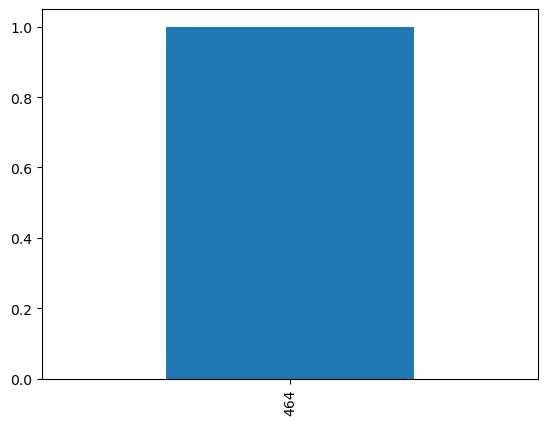

In [18]:
dataset.groupby('id')['diagnosis'].plot.bar()


In [19]:
dataset.drop(columns = 'id', inplace =True)

In [20]:
num_columns.remove('id')

In [21]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
discrete_feature = []
continuous_feature = []
for feature in num_columns:
    if dataset[feature].nunique() < 15:
        discrete_feature.append(feature)
    else:
        continuous_feature.append(feature)
print(discrete_feature)
print(continuous_feature)

[]
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [23]:
len(continuous_feature)

30

In [24]:
dataset.shape

(569, 31)

In [25]:
dataset.groupby('diagnosis').count()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
1,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


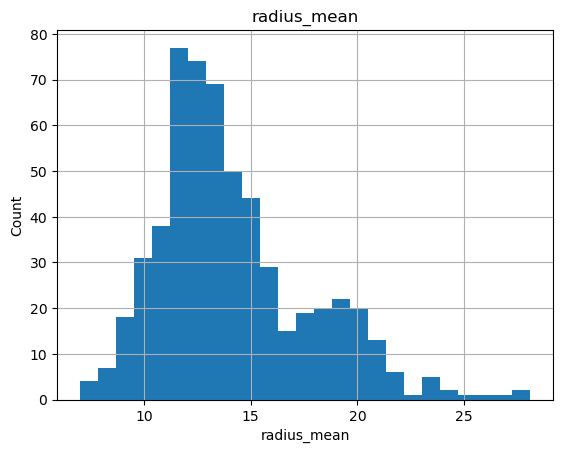

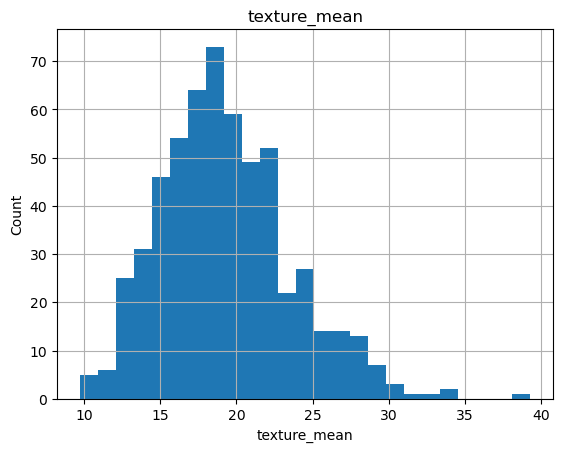

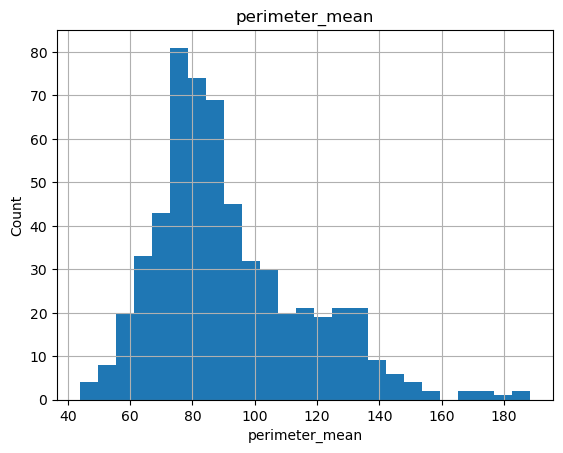

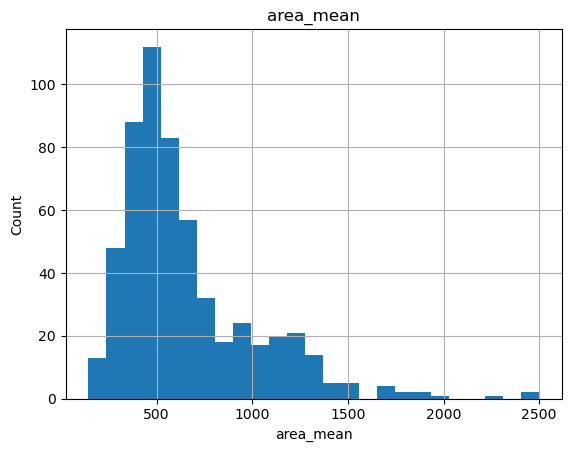

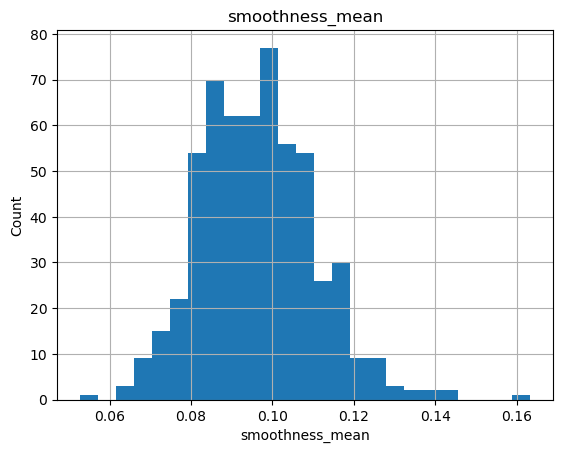

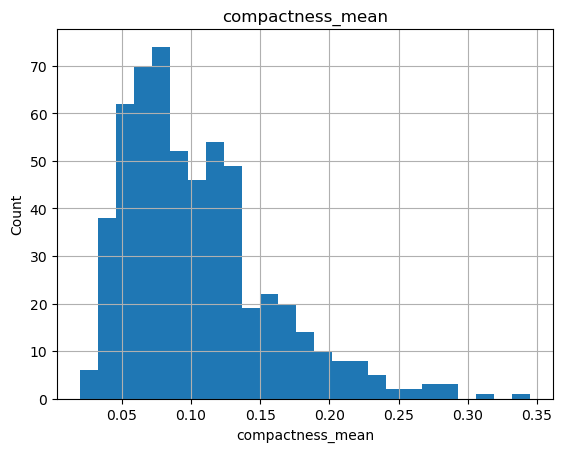

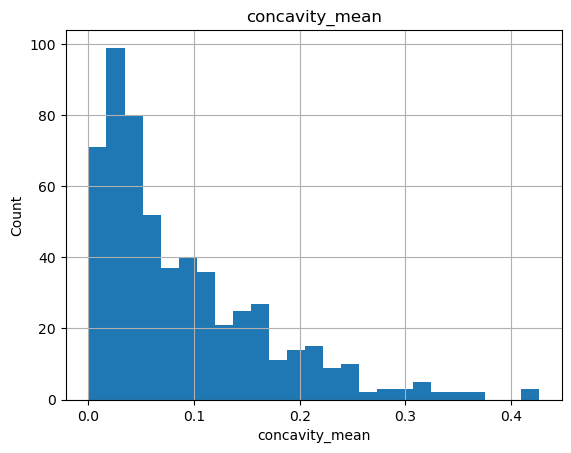

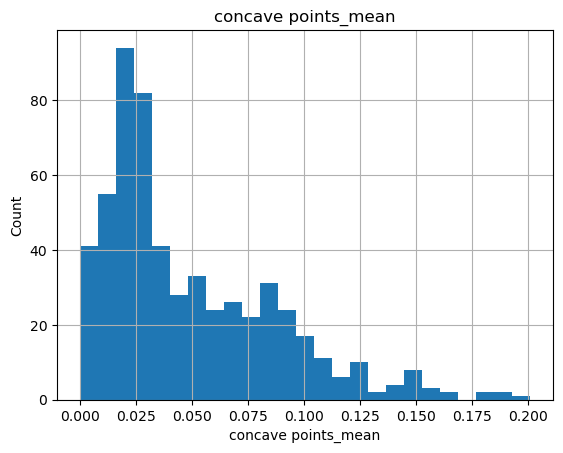

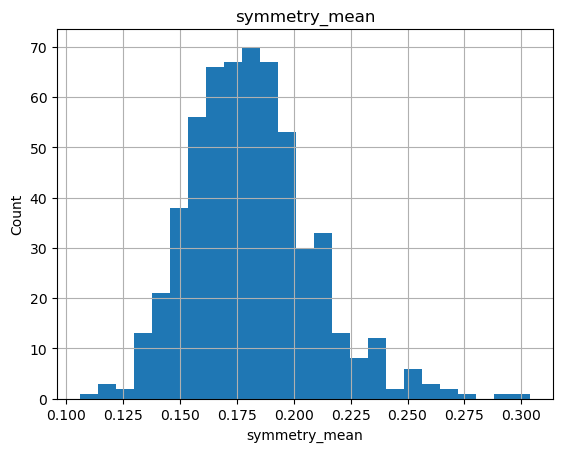

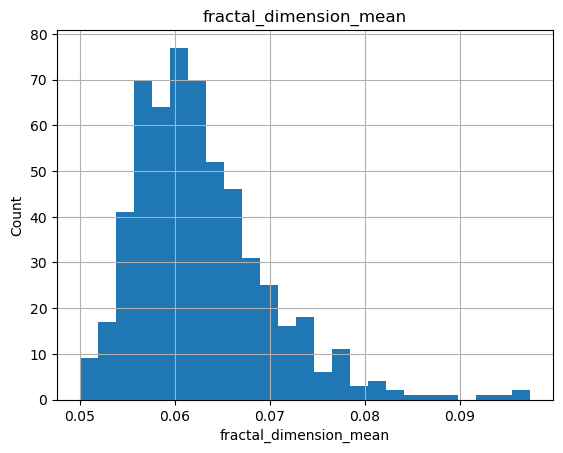

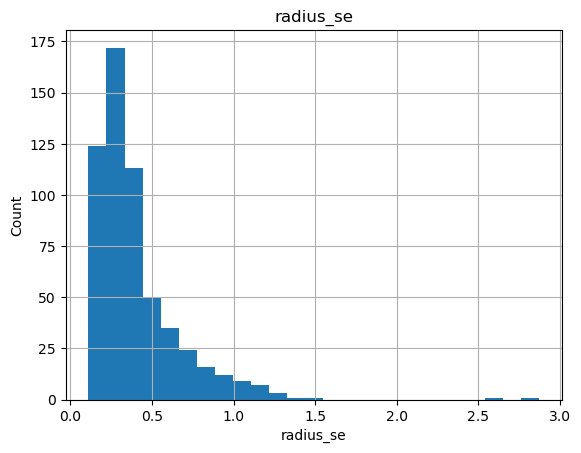

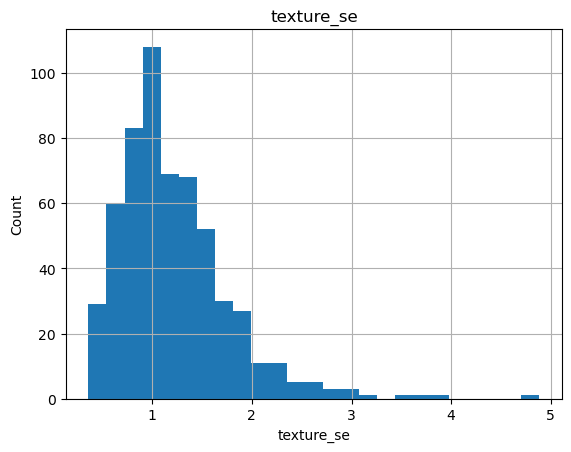

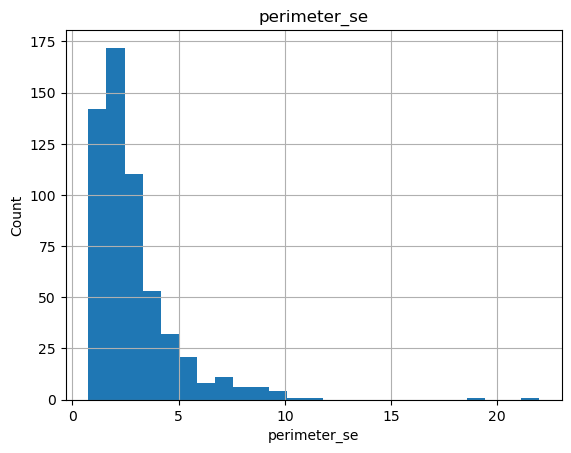

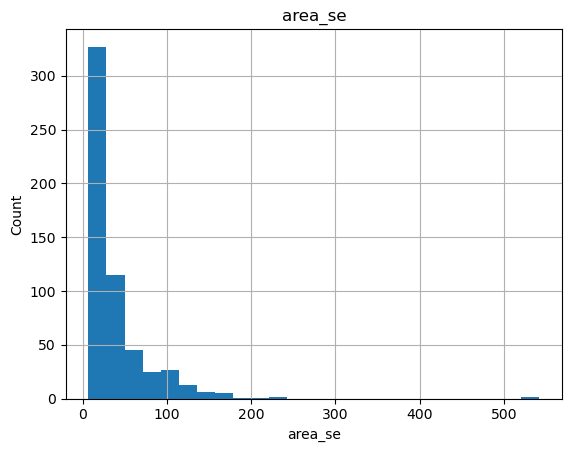

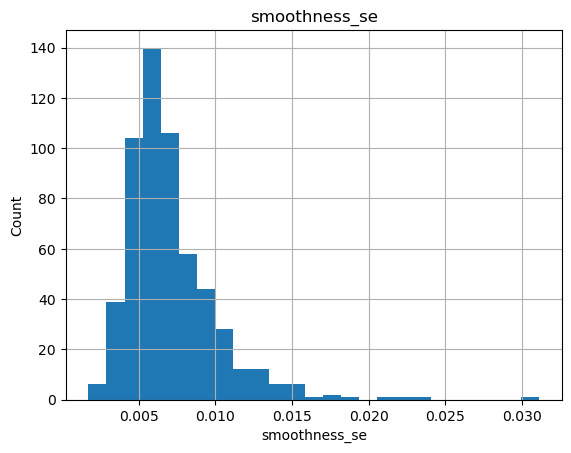

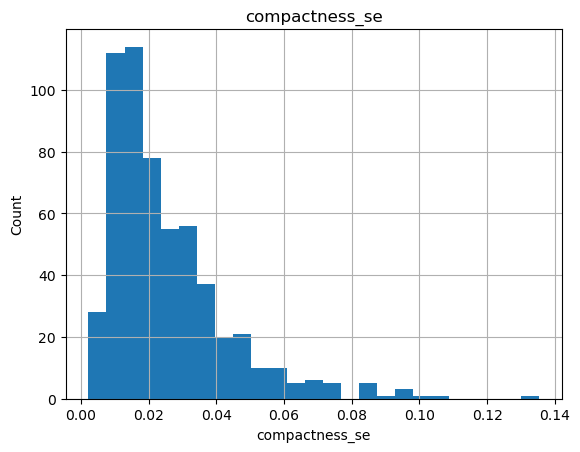

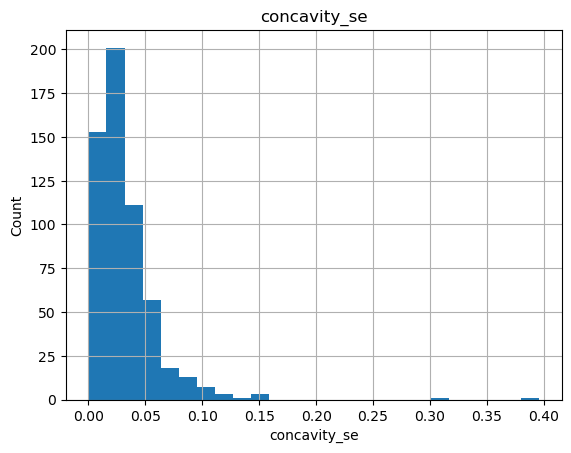

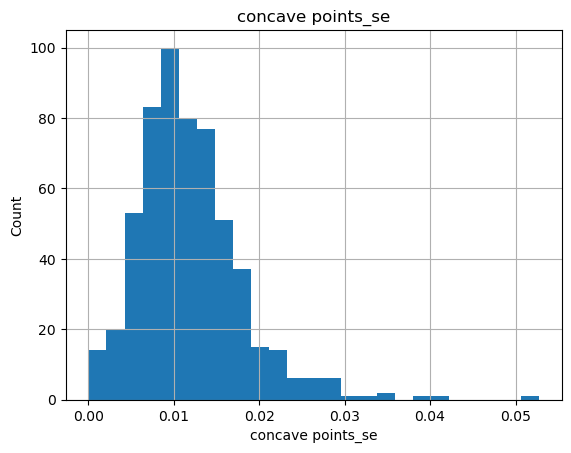

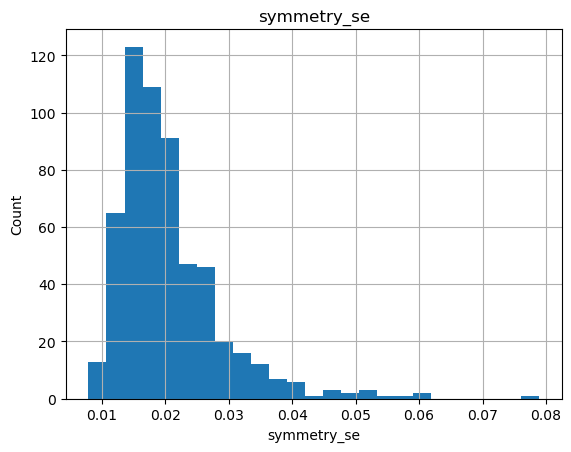

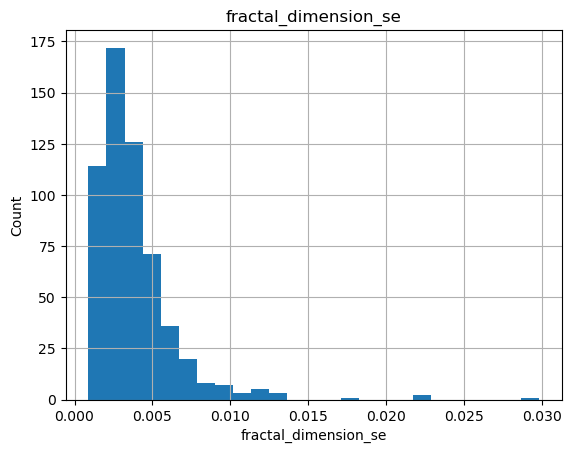

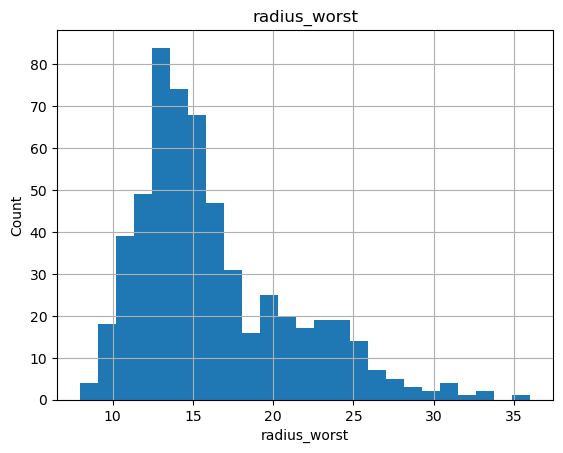

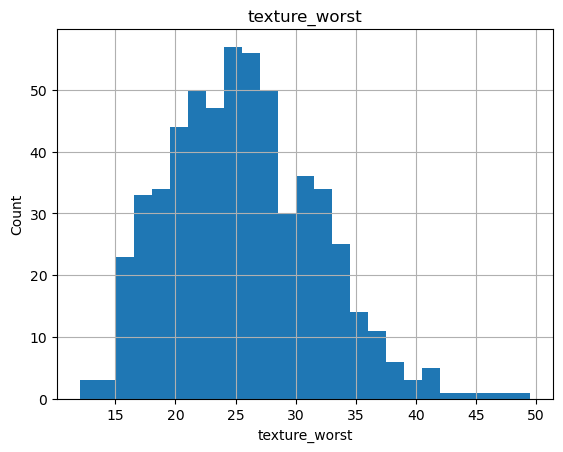

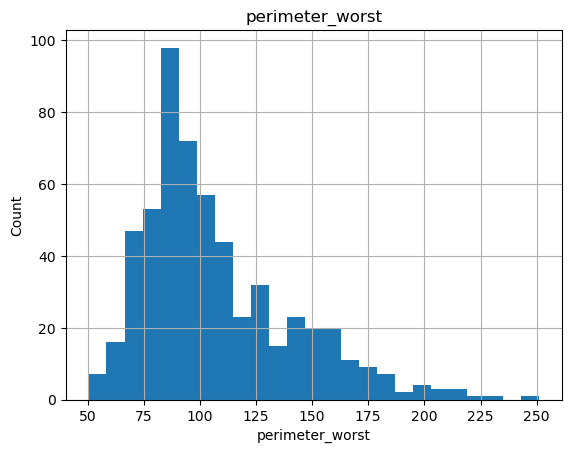

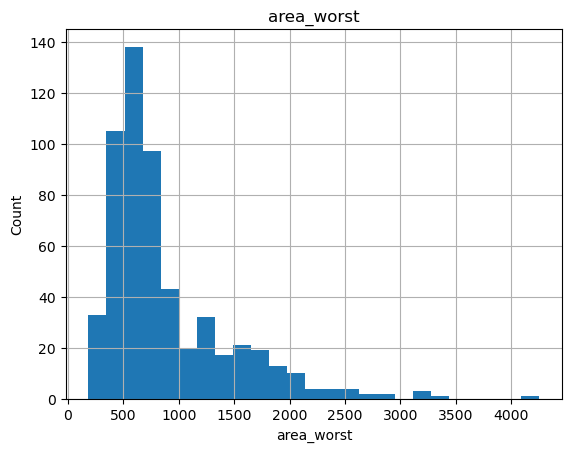

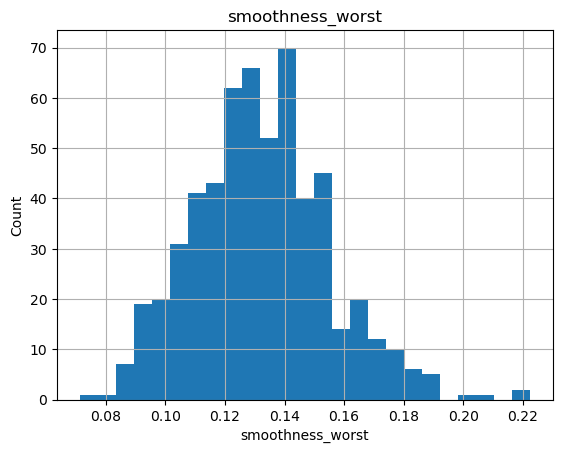

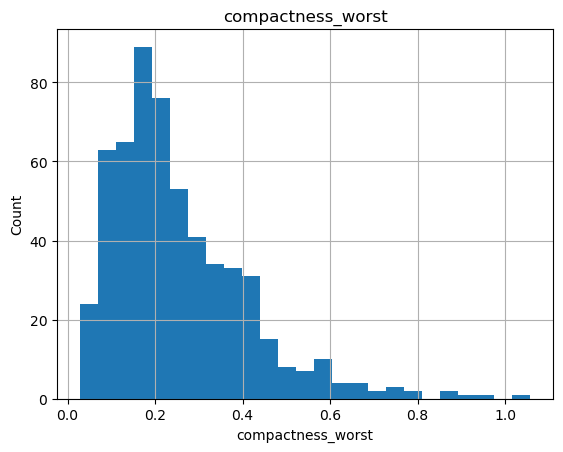

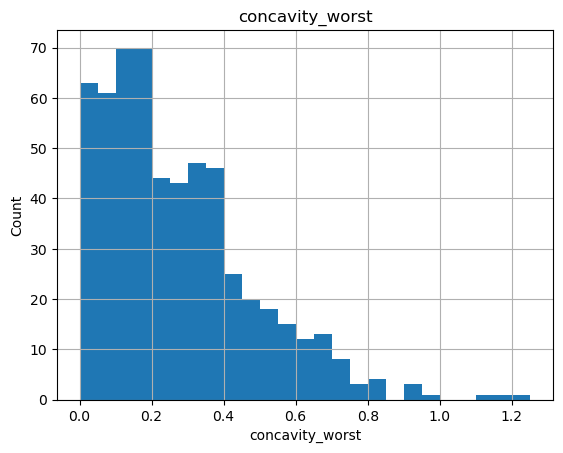

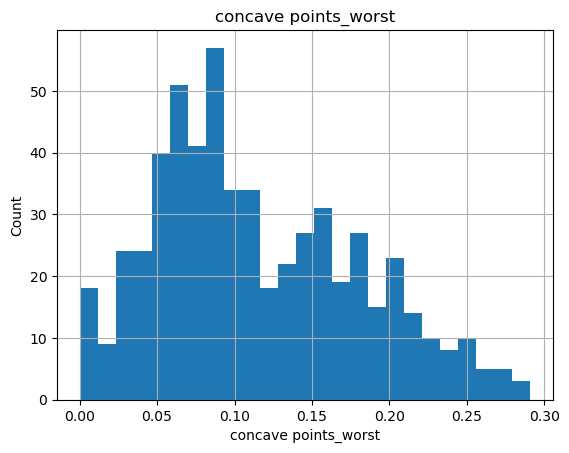

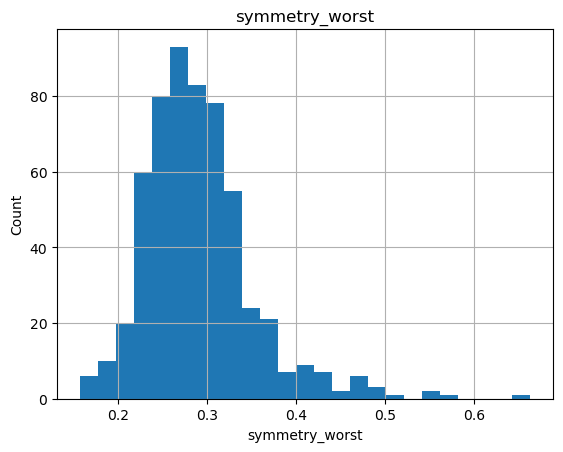

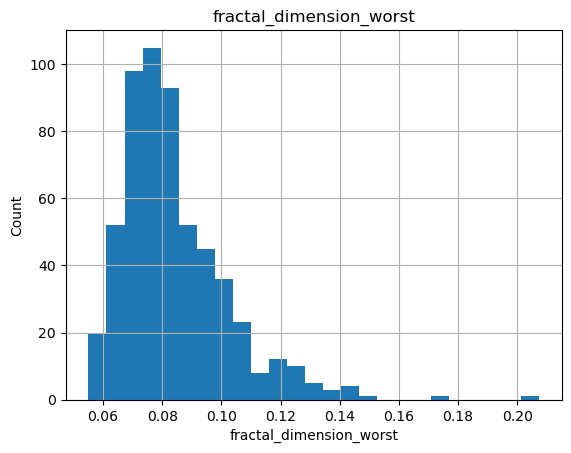

In [26]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


In [27]:
import seaborn as sns

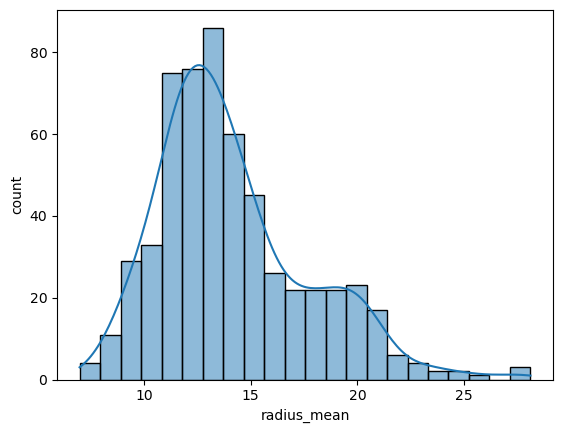

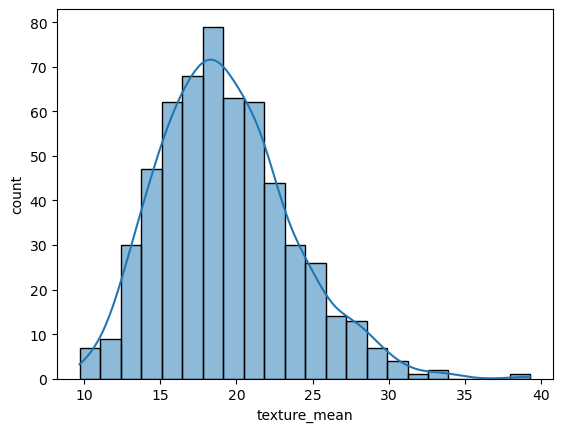

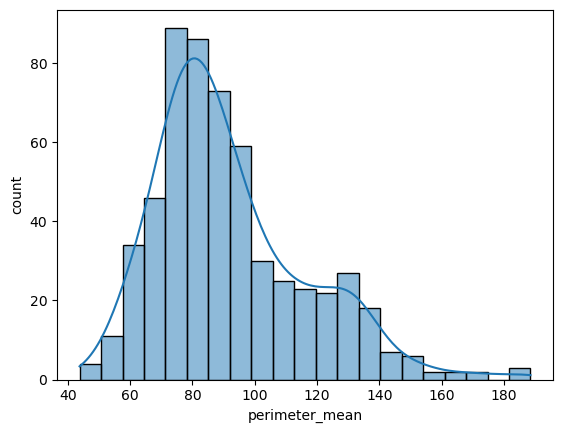

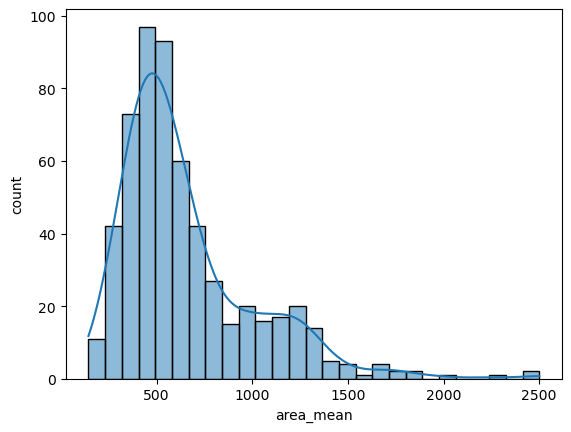

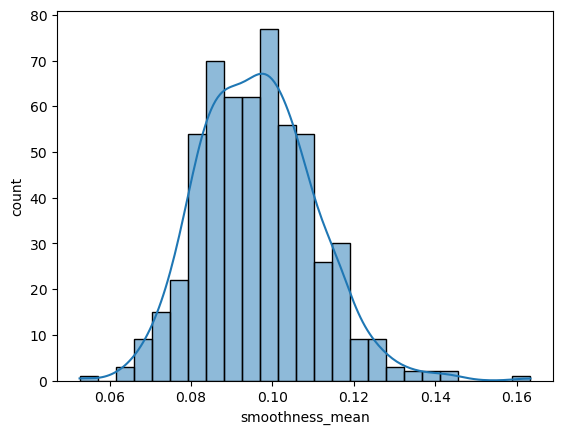

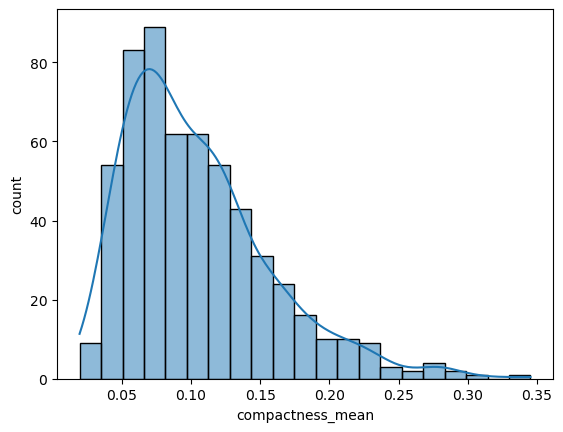

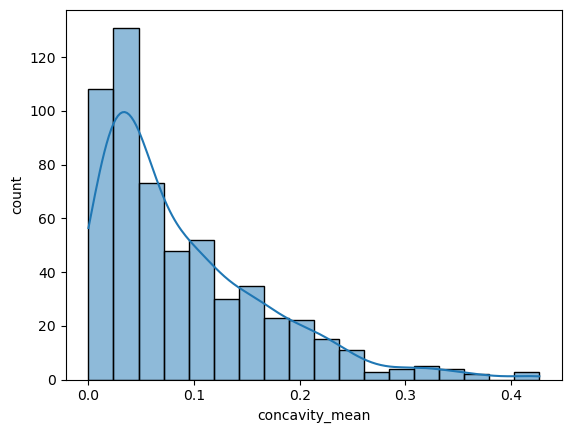

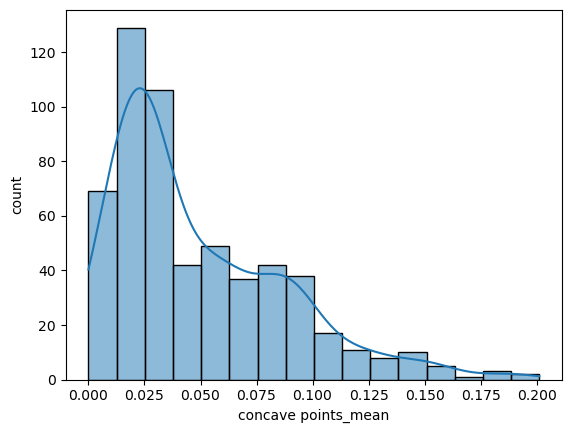

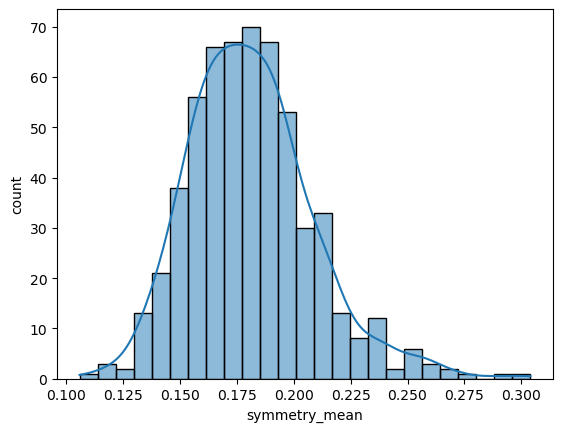

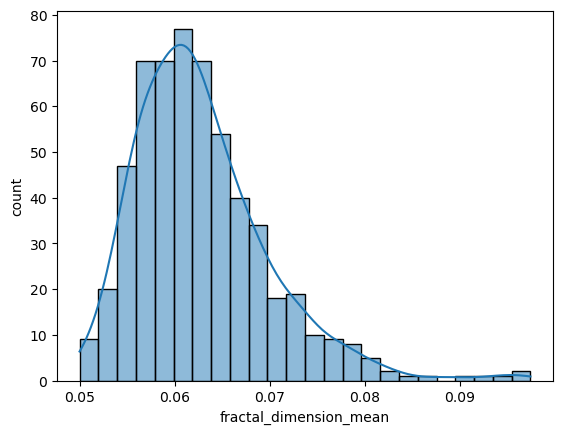

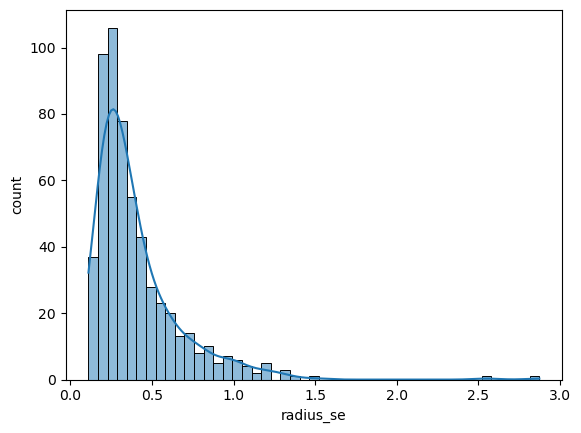

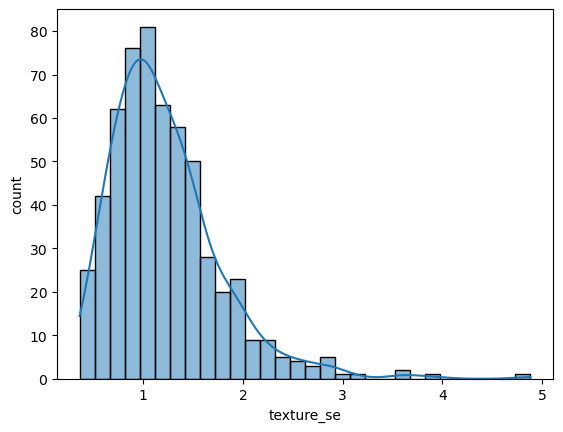

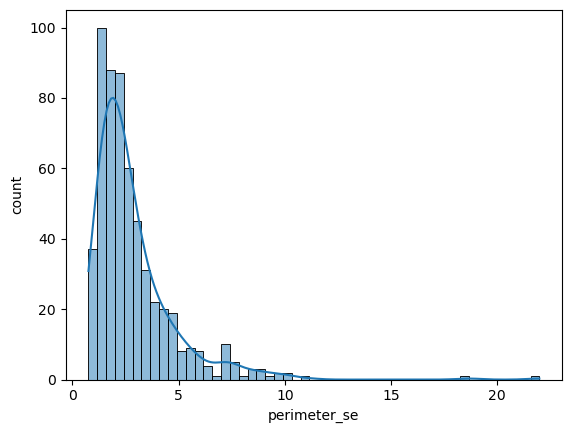

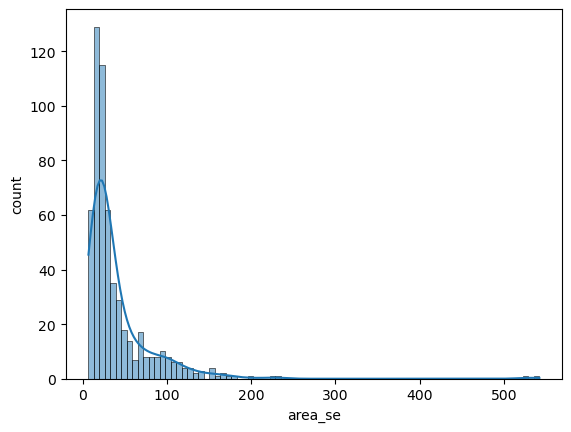

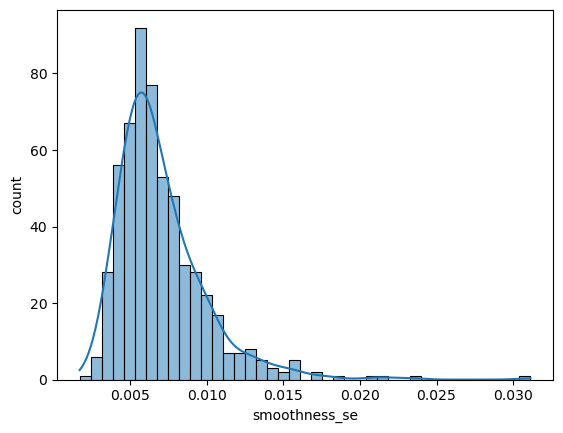

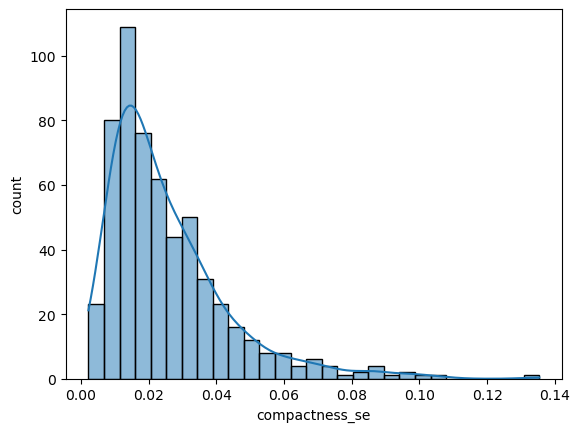

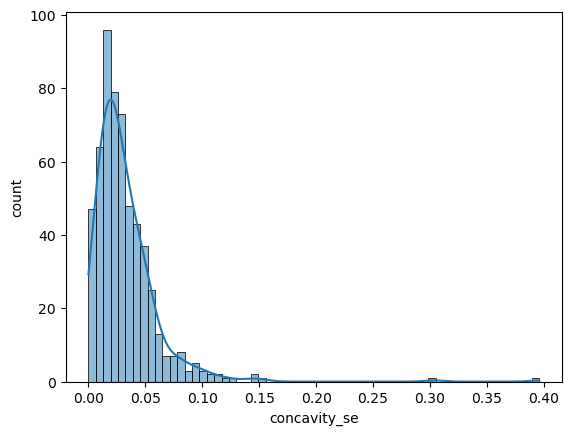

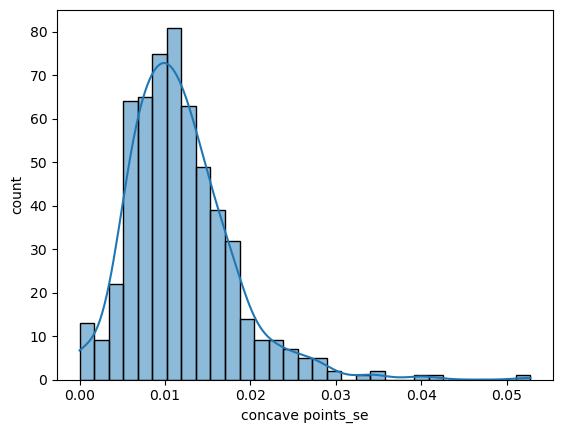

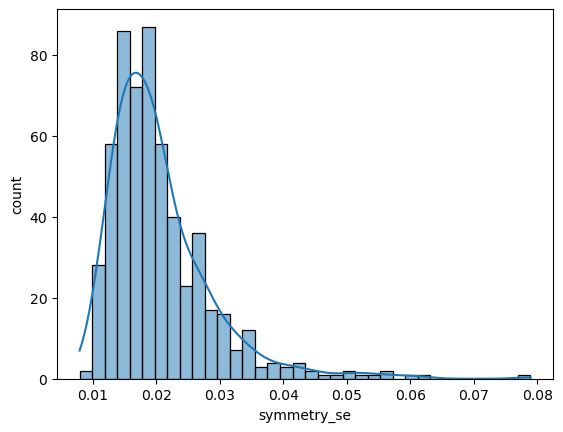

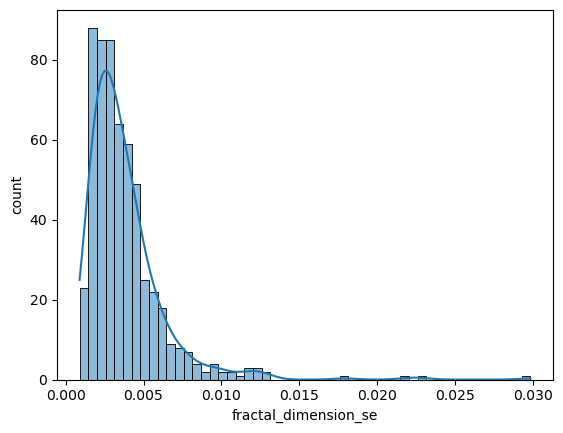

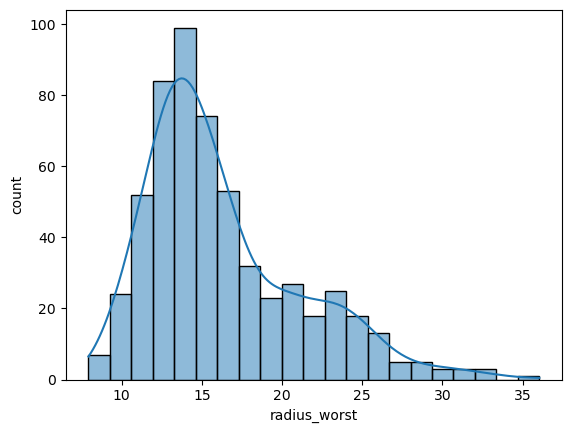

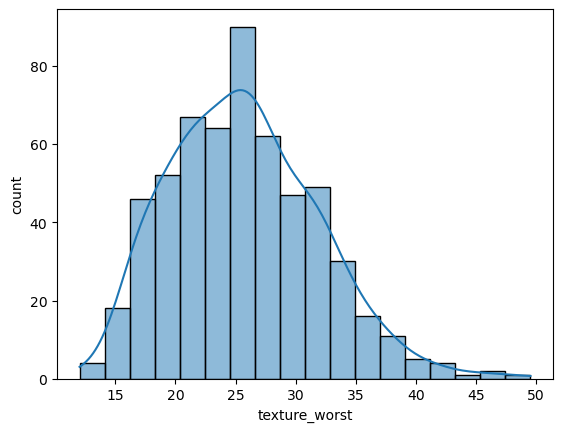

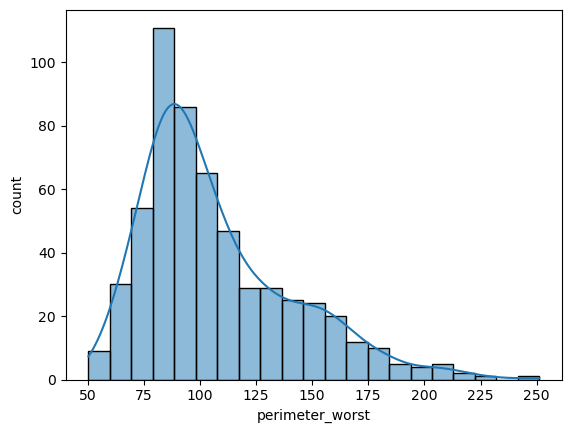

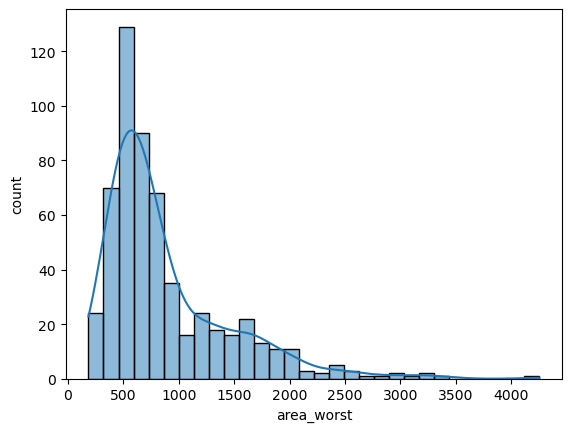

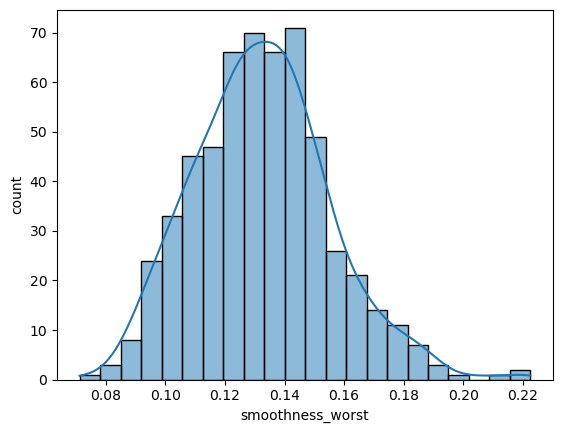

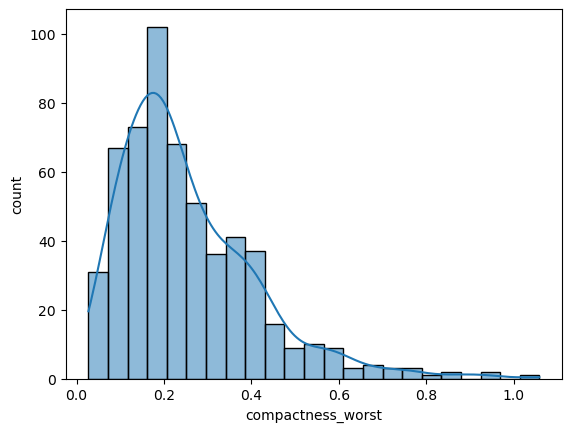

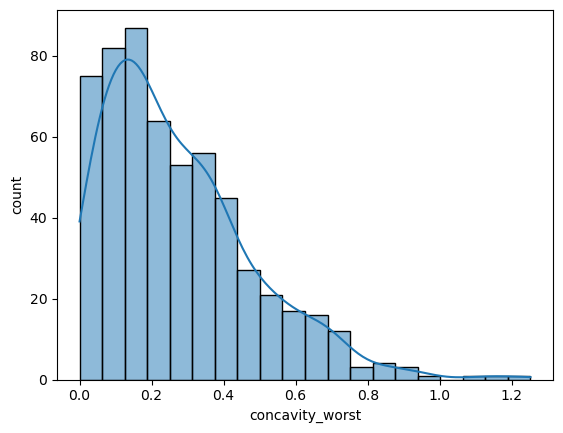

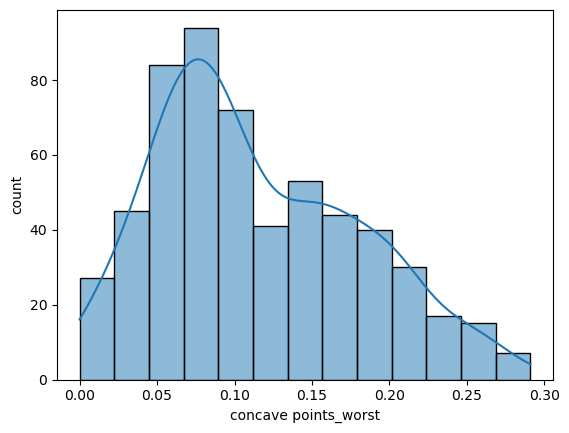

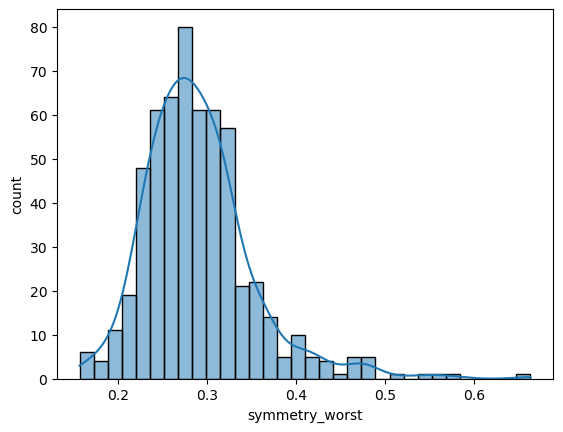

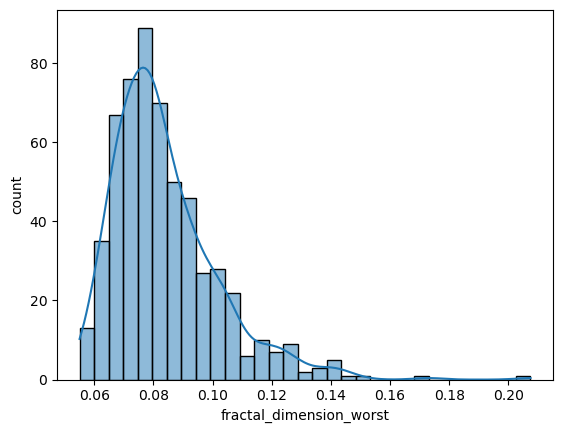

In [28]:
data = dataset.copy()
for feature in continuous_feature:
    sns.histplot(data[feature], kde = True)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

<Axes: >

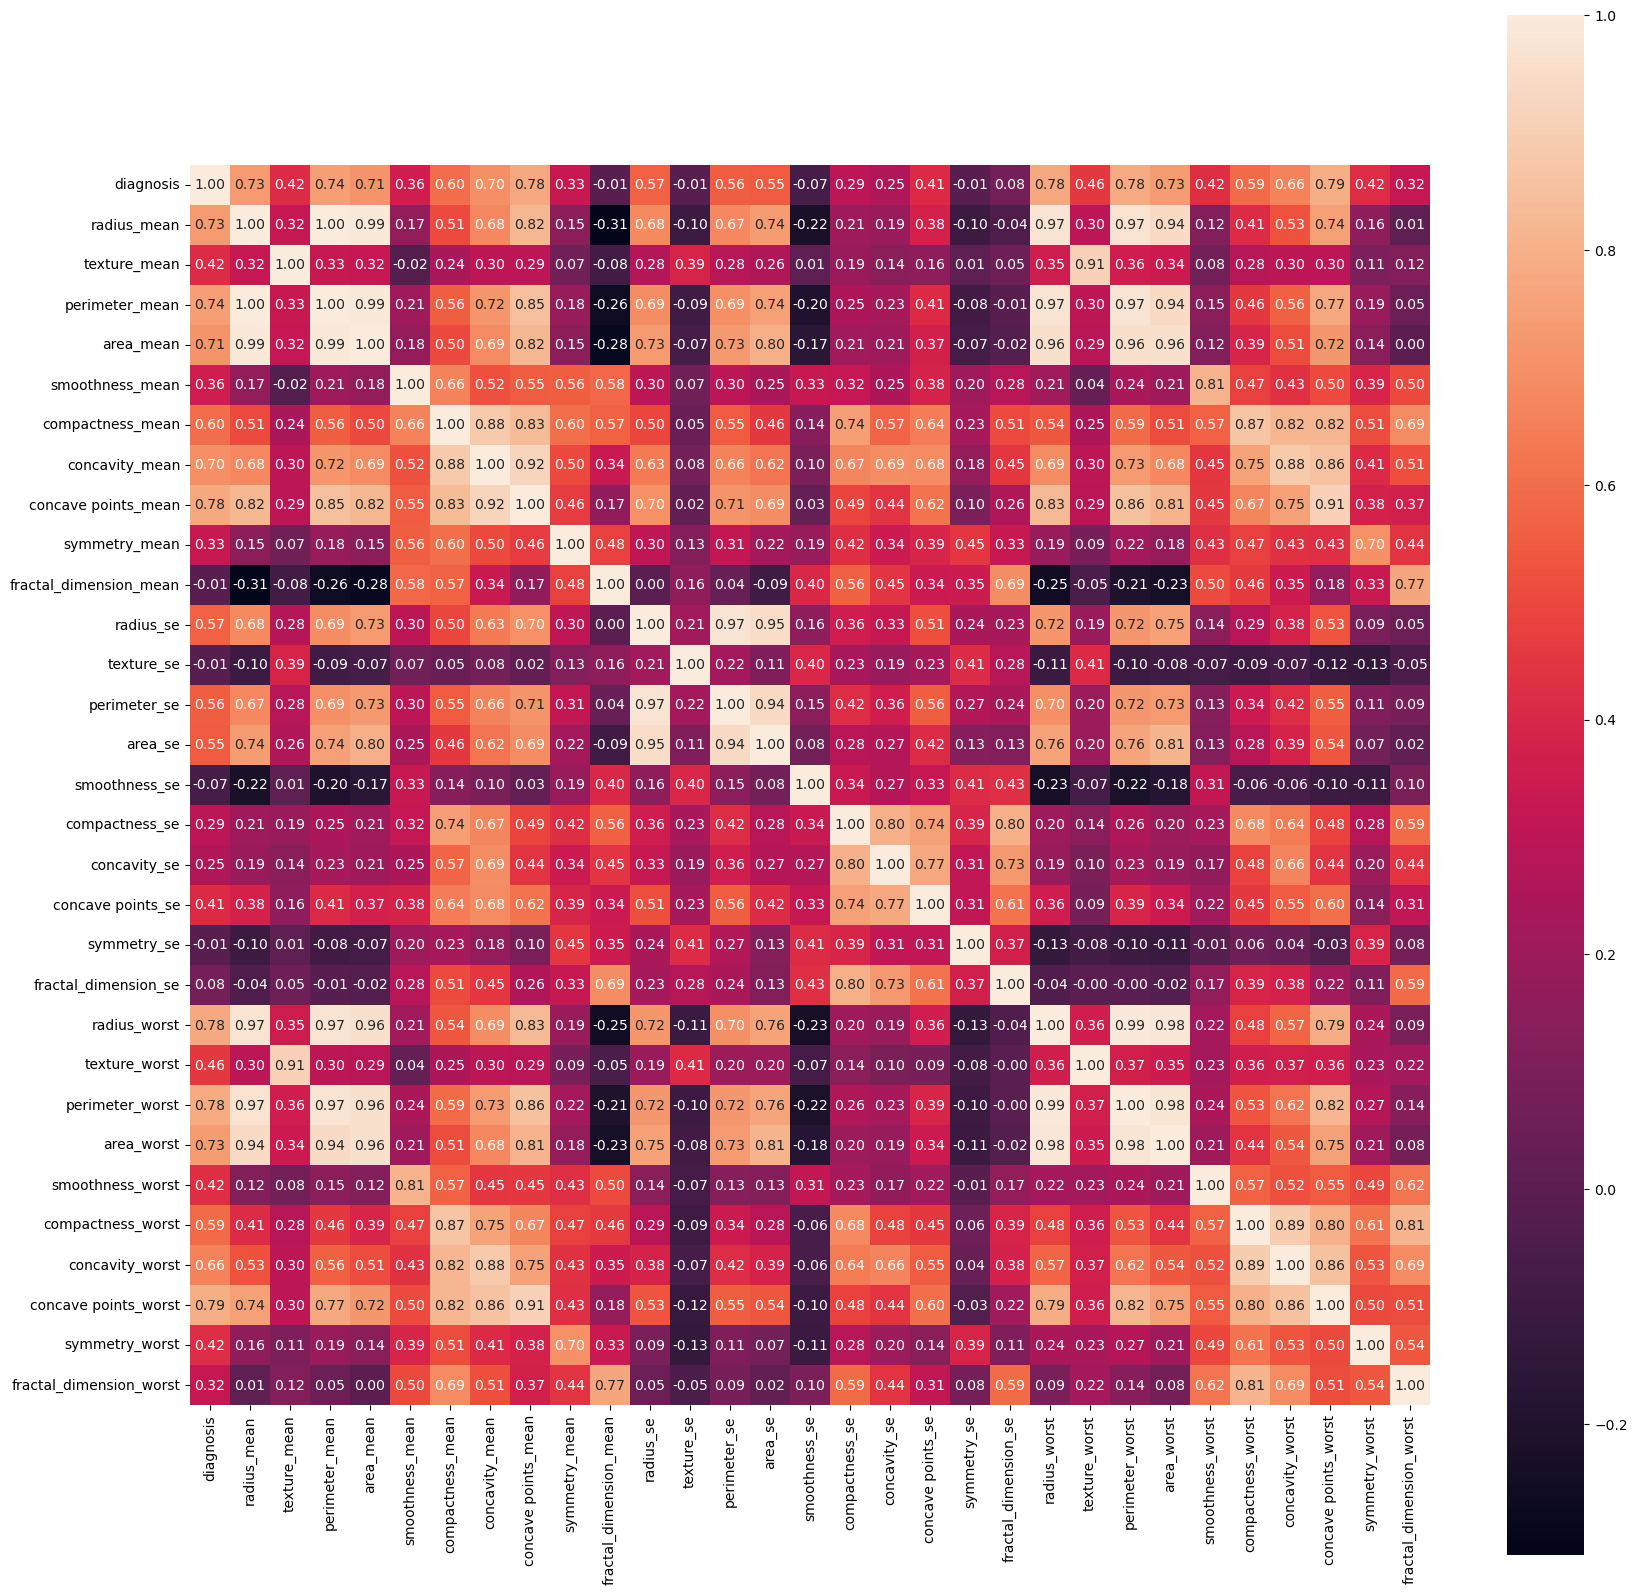

In [29]:
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(),annot = True , fmt = '0.2f', square = True)

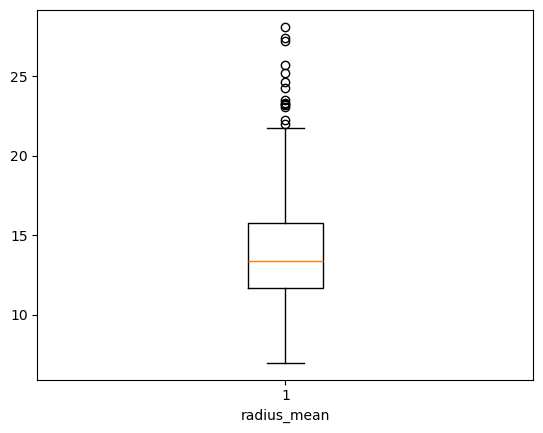

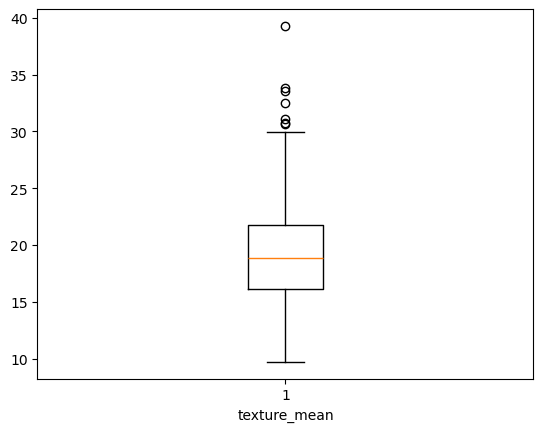

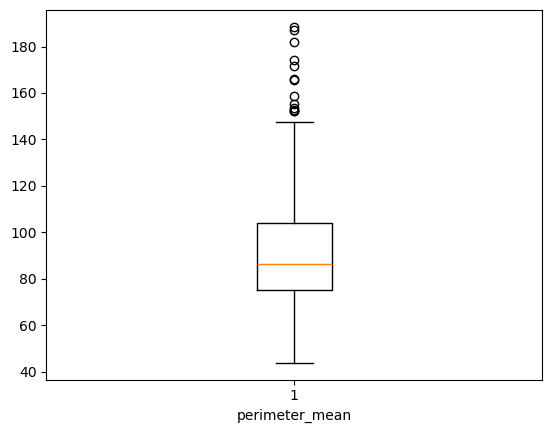

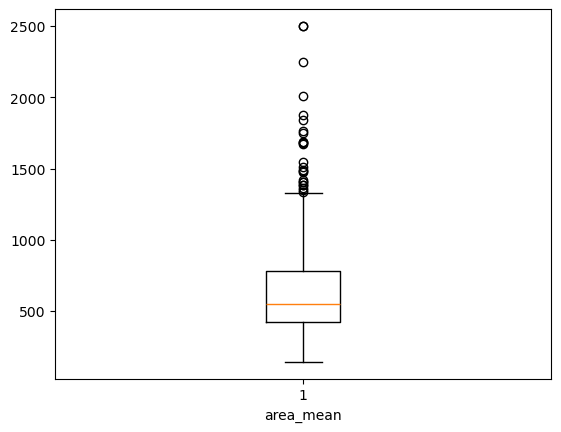

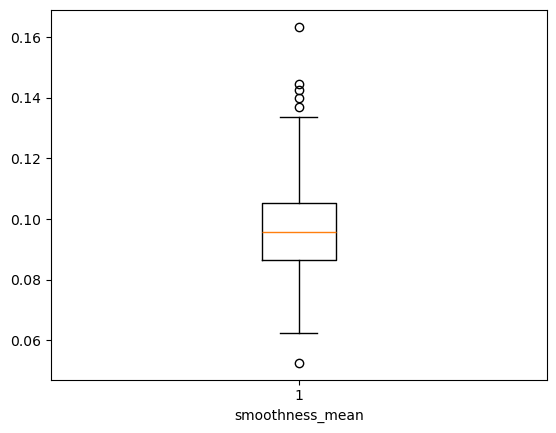

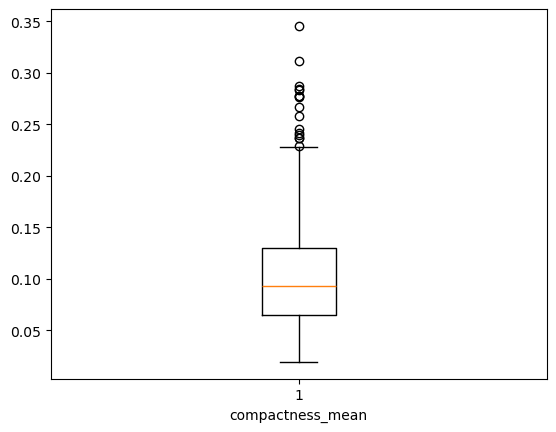

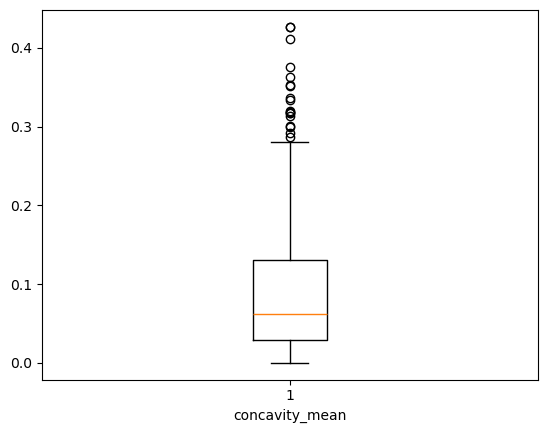

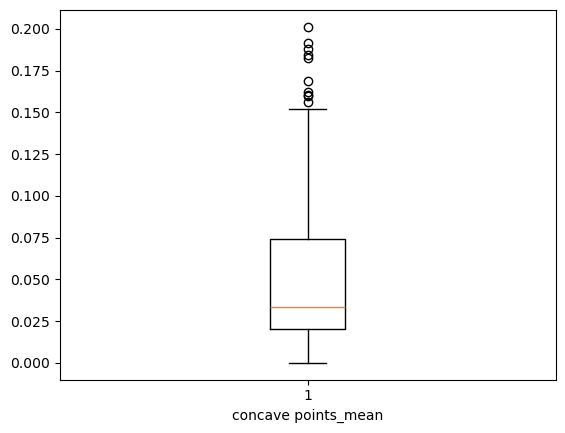

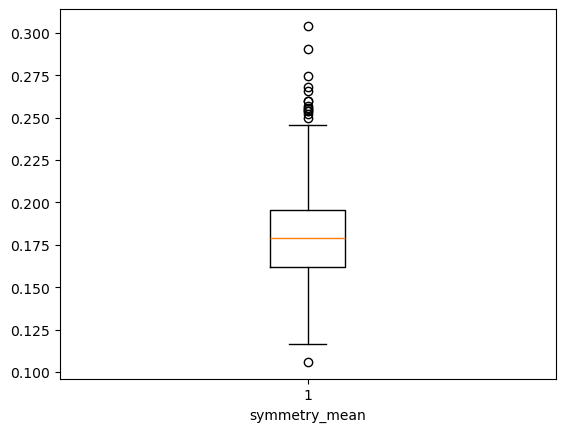

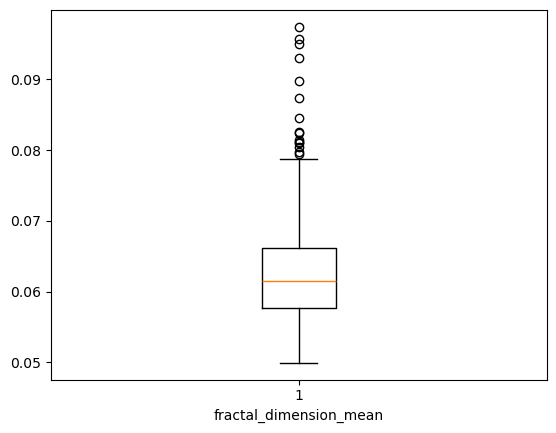

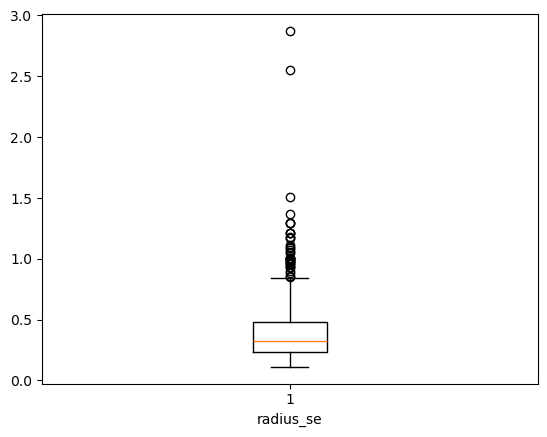

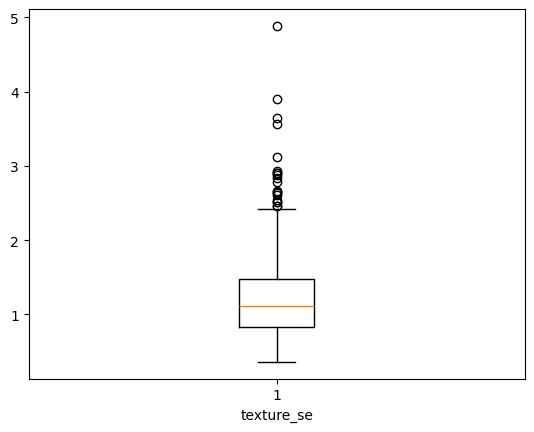

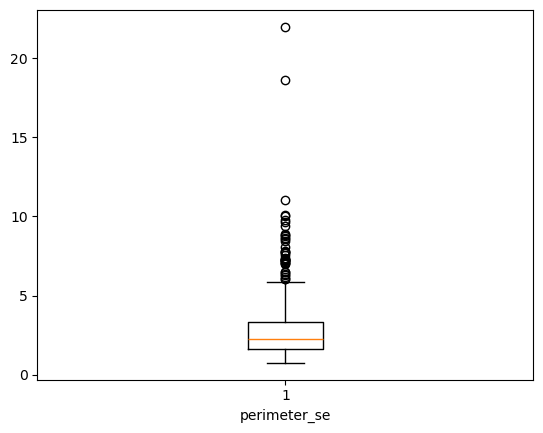

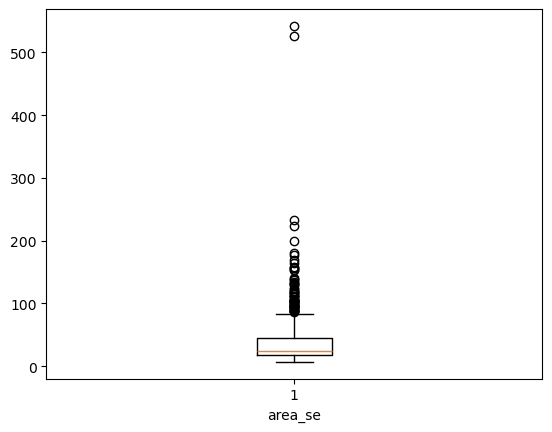

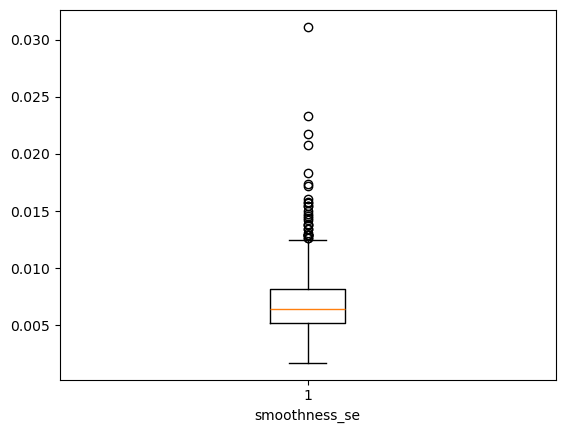

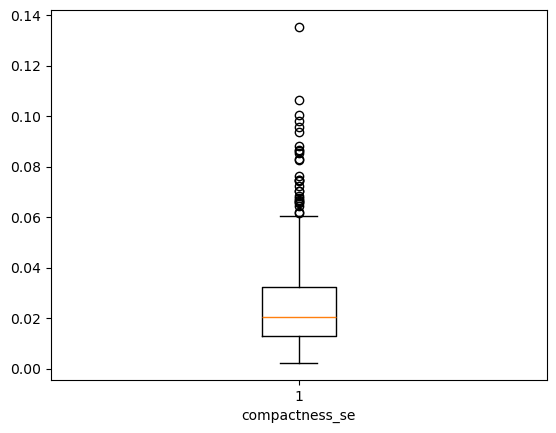

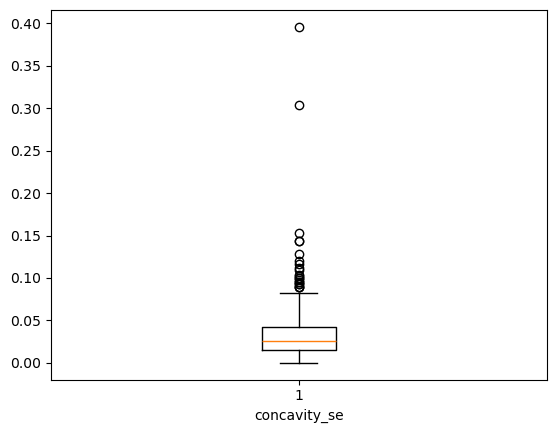

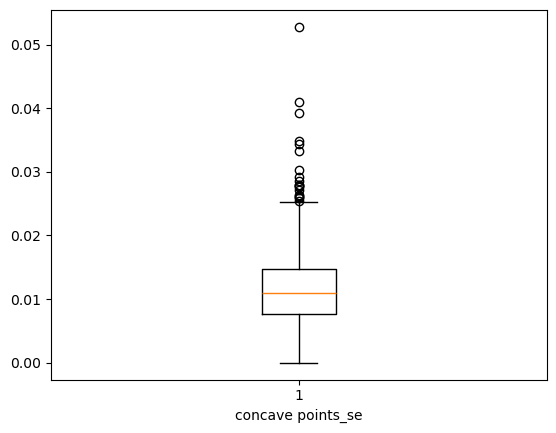

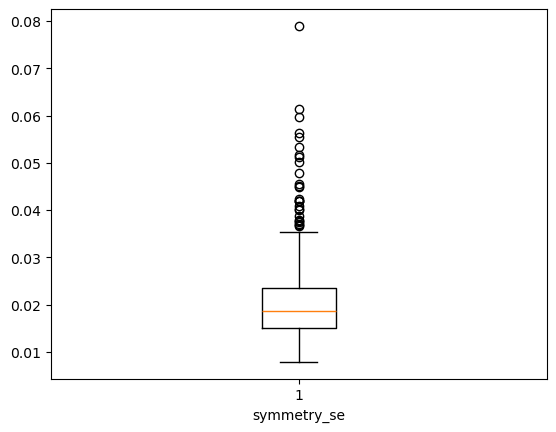

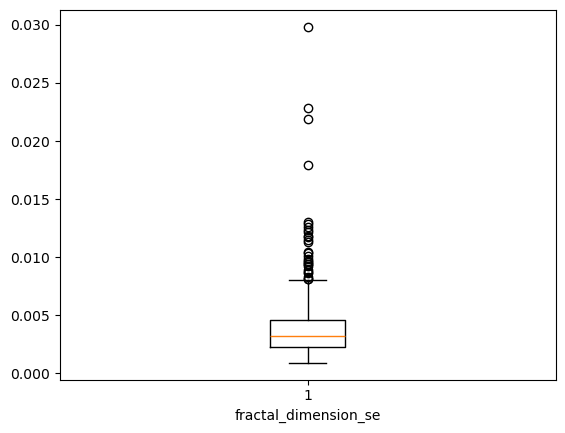

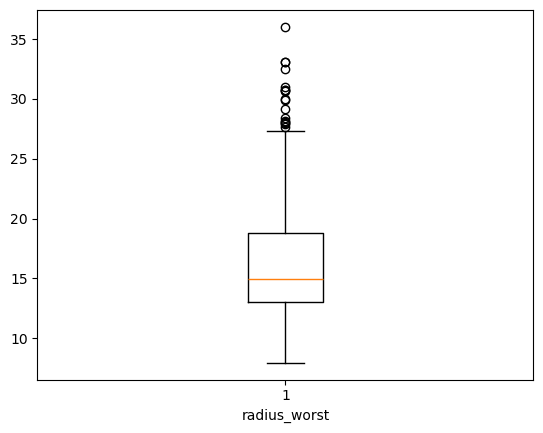

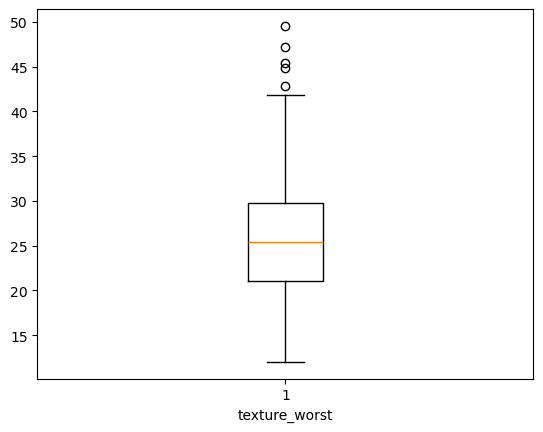

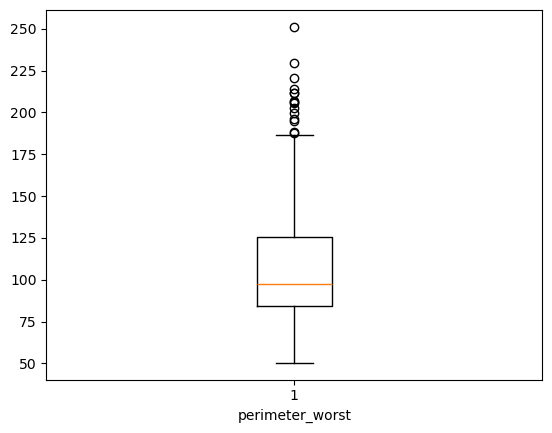

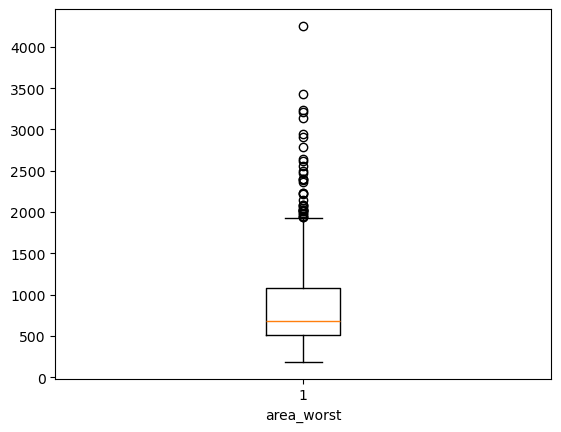

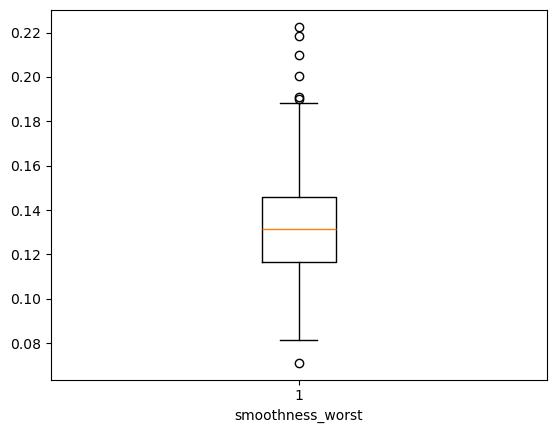

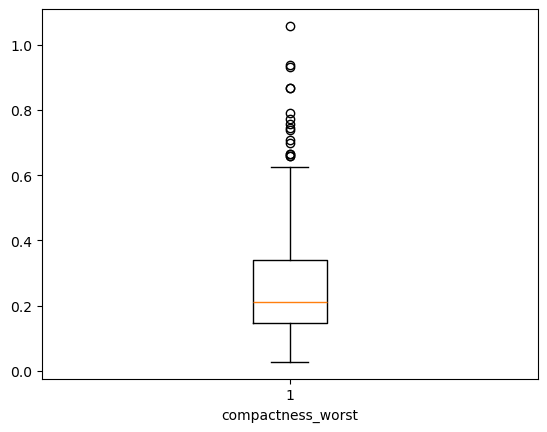

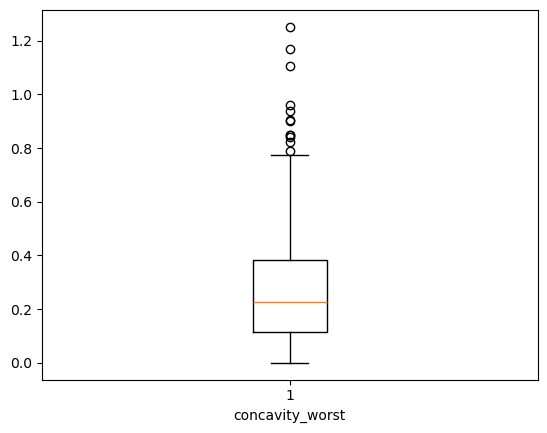

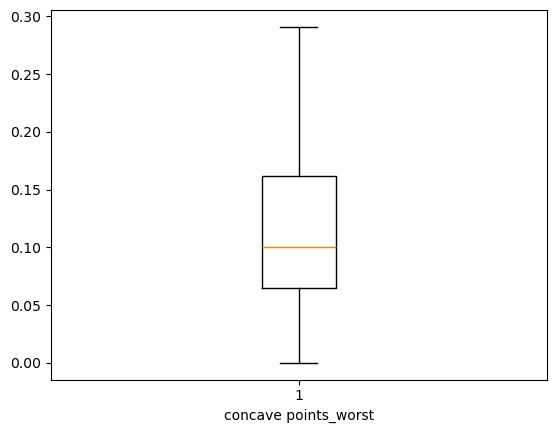

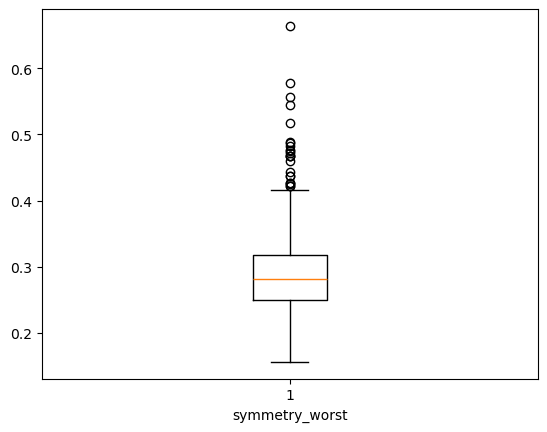

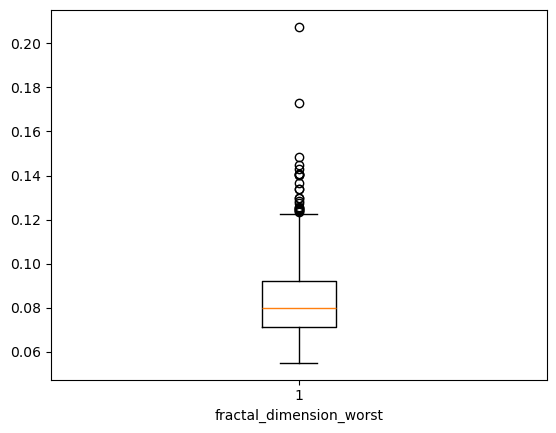

In [30]:
data = dataset.copy()

for feature in continuous_feature:
    plt.boxplot(data[feature])
    plt.xlabel(feature)
    plt.show()
        

In [31]:
dataset.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = dataset.drop(columns=['diagnosis'])
Y = dataset['diagnosis']

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25,random_state = 3)

In [35]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
251,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.11830,0.10490,0.08105,0.06544,0.2740,0.06487
550,10.86,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,...,11.66,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
18,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615
319,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351


In [36]:
X_train.to_csv("Processed.csv")

In [37]:
process_data = X_train
process_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
251,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.11830,0.10490,0.08105,0.06544,0.2740,0.06487
550,10.86,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,...,11.66,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
18,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615
319,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifierCV,SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.kernel_approximation import RBFSampler

scorer = make_scorer(accuracy_score)

models = {
    'ridge': RidgeClassifierCV(),
    'sgd': SGDClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'extra_trees': ExtraTreeClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
    'mlp': MLPClassifier(),
    'bagging': BaggingClassifier(),
    'adaboost': AdaBoostClassifier(),
    'svr': LinearSVC(),
    'nusvc': NuSVC(),
    'vote': VotingClassifier(estimators=[
    ('ridge', RidgeClassifierCV()),
    ('sgd', SGDClassifier()),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('extra_trees', ExtraTreeClassifier()),
    ('gradient_boosting', GradientBoostingClassifier()),
    ('mlp', MLPClassifier()),
    ('bagging', BaggingClassifier()),
    ('adaboost', AdaBoostClassifier()),
    ('svr', LinearSVC()),
    ('nusvc', NuSVC())
])
}

from sklearn.model_selection import cross_val_score

def cross_val_scores(model_name, model):
    print(f"Running cross-validation for {model_name}...")
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring=scorer)
    print(f"Cross-validation accuracy scores for {model_name}: {scores}")
    print(f"Average cross-validation accuracy score for {model_name}: {scores.mean()}")

for model_name, model in models.items():
    cross_val_scores(model_name, model)

Running cross-validation for ridge...
Cross-validation accuracy scores for ridge: [0.97674419 0.96470588 0.92941176 0.92941176 0.96470588]
Average cross-validation accuracy score for ridge: 0.9529958960328319
Running cross-validation for sgd...
Cross-validation accuracy scores for sgd: [0.97674419 0.90588235 0.88235294 0.85882353 0.89411765]
Average cross-validation accuracy score for sgd: 0.9035841313269494
Running cross-validation for decision_tree...
Cross-validation accuracy scores for decision_tree: [0.97674419 0.94117647 0.92941176 0.85882353 0.85882353]
Average cross-validation accuracy score for decision_tree: 0.9129958960328317
Running cross-validation for random_forest...
Cross-validation accuracy scores for random_forest: [1.         0.97647059 0.97647059 0.92941176 0.97647059]
Average cross-validation accuracy score for random_forest: 0.9717647058823531
Running cross-validation for extra_trees...
Cross-validation accuracy scores for extra_trees: [0.94186047 0.94117647 0.929

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation accuracy scores for mlp: [0.96511628 0.90588235 0.95294118 0.85882353 0.96470588]
Average cross-validation accuracy score for mlp: 0.9294938440492476
Running cross-validation for bagging...
Cross-validation accuracy scores for bagging: [1.         0.95294118 0.96470588 0.90588235 0.97647059]
Average cross-validation accuracy score for bagging: 0.96
Running cross-validation for adaboost...


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Li

Cross-validation accuracy scores for adaboost: [0.98837209 0.94117647 0.95294118 0.92941176 0.98823529]
Average cross-validation accuracy score for adaboost: 0.9600273597811217
Running cross-validation for svr...
Cross-validation accuracy scores for svr: [0.98837209 0.96470588 0.97647059 0.90588235 0.97647059]
Average cross-validation accuracy score for svr: 0.9623803009575923
Running cross-validation for nusvc...
Cross-validation accuracy scores for nusvc: [0.94186047 0.84705882 0.90588235 0.78823529 0.90588235]
Average cross-validation accuracy score for nusvc: 0.8777838577291381
Running cross-validation for vote...


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural

Cross-validation accuracy scores for vote: [1.         0.95294118 0.96470588 0.91764706 0.98823529]
Average cross-validation accuracy score for vote: 0.9647058823529411


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

acc_scorer = make_scorer(accuracy_score, greater_is_better=True)
f1_scorer = make_scorer(f1_score, greater_is_better=True)

param_grid = {
    'ridge': {
        'alpha': [0.05, 0.01, 0.05, 0.1, 0.5],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],
        'max_iter': [500, 1000, 2000]
    },
    'sgd': {
        'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
        'max_iter': [500, 1000, 2000]
    },
    'decision_tree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['gini', 'entropy', 'log_loss']
    },
    'random_forest': {
        'n_estimators': [50, 100, 250],
        'max_depth': [5, 7, 10],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['gini', 'entropy', 'log_loss']
    },
    'extra_trees': {
        'max_depth': [5, 7, 10],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'criterion': ['gini', 'entropy', 'log_loss']
    },
    'gradient_boosting': {
        'n_estimators': [50, 100, 250],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    },
    'mlp': {
        'hidden_layer_sizes': [(50, 50), (100, 100), (200, 200)],
 'activation': ['relu', 'tanh', 'sigmoid'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.05, 0.1, 0.5, 1.0],
        'max_iter': [500, 1000, 2000]
    },
    'bagging': {
        'n_estimators': [50, 100, 250],
        'max_samples': [0.2, 0.5, 0.8, 1.0],
        'max_features': [0.2, 0.5, 0.8, 1.0]
    },
    'adaboost': {
        'n_estimators':[50, 100, 250],
        'learning_rate': [0.001, 0.01, 0.05, 0.1]
    },
    'svr': {
        'C': [1e0, 1e2, 1e4],
        'max_iter' : [100,200,300]
    }
}

models = {
    'ridge': RidgeClassifier(),
    'sgd': SGDClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'extra_trees': ExtraTreeClassifier(),
    'mlp': MLPClassifier(),
    'bagging': BaggingClassifier(),
    'adaboost': AdaBoostClassifier(),
    'svr': LinearSVC(),
    'gradient_boosting': GradientBoostingClassifier()
    
}

def grid_search_model(model_name, model, param_grid):
    print(f"Running GridSearchCV for {model_name}...")
    scorers = {'accuracy': acc_scorer, 'f1': f1_scorer}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorers, refit='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {model_name}: {grid_search.best_score_}")
    return grid_search.best_estimator_

best_models = {}
for model_name in models:
    best_models[model_name] = grid_search_model(model_name, models[model_name], param_grid[model_name])

for model_name, model in best_models.items():
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    print(f"Accuracy for {model_name} on test set: {accuracy}\n F1 score on mode {f1}")

Running GridSearchCV for ridge...
Best parameters for ridge: {'alpha': 0.05, 'max_iter': 500, 'solver': 'auto'}
Best Accuracy for ridge: 0.9553488372093024
Running GridSearchCV for sgd...


C:\Users\Hp\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for sgd: {'alpha': 0.01, 'loss': 'modified_huber', 'max_iter': 500, 'penalty': 'elasticnet'}
Best Accuracy for sgd: 0.9247606019151846
Running GridSearchCV for decision_tree...


C:\Users\Hp\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for decision_tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy for decision_tree: 0.9341723666210671
Running GridSearchCV for random_forest...
Best parameters for random_forest: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy for random_forest: 0.9741176470588236
Running GridSearchCV for extra_trees...


C:\Users\Hp\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for extra_trees: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy for extra_trees: 0.9459097127222982
Running GridSearchCV for mlp...


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
142 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\uti

Best parameters for mlp: {'activation': 'tanh', 'alpha': 1.0, 'hidden_layer_sizes': (100, 100), 'max_iter': 2000, 'solver': 'adam'}
Best Accuracy for mlp: 0.9388782489740082
Running GridSearchCV for bagging...
Best parameters for bagging: {'max_features': 0.2, 'max_samples': 0.8, 'n_estimators': 250}
Best Accuracy for bagging: 0.9717647058823531
Running GridSearchCV for adaboost...


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for adaboost: {'learning_rate': 0.1, 'n_estimators': 100}
Best Accuracy for adaboost: 0.9717647058823531
Running GridSearchCV for svr...
Best parameters for svr: {'C': 1.0, 'max_iter': 100}
Best Accuracy for svr: 0.9623803009575923
Running GridSearchCV for gradient_boosting...
Best parameters for gradient_boosting: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 250, 'subsample': 0.9}
Best Accuracy for gradient_boosting: 0.9788235294117648
Accuracy for ridge on test set: 0.965034965034965
 F1 score on mode 0.9514563106796117
Accuracy for sgd on test set: 0.8531468531468531
 F1 score on mode 0.8264462809917356
Accuracy for decision_tree on test set: 0.9370629370629371
 F1 score on mode 0.912621359223301
Accuracy for random_forest on test set: 0.9370629370629371
 F1 score on mode 0.9142857142857143
Accuracy for extra_trees on test set: 0.9370629370629371
 F1 score on mode 0.9142857142857143
Accuracy for mlp on test set: 0.9090909090909091
 F1

### Ridge Classifier works best

In [67]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha = 0.05, max_iter = 500, solver = 'auto')

In [69]:
ridge.fit(X_train, Y_train)

RidgeClassifier(alpha=0.05, max_iter=500)

In [71]:
Y_pred = ridge.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print(f"Accuracy for {model_name} on test set: {accuracy}\n F1 score on mode {f1}")

Accuracy for gradient_boosting on test set: 0.965034965034965
 F1 score on mode 0.9514563106796117


In [73]:
input_data = (19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88,19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88, 186.80, 2398.0, 0.53720,19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88, 186.80, 2398.0, 0.53720)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = ridge.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(


In [42]:
import pickle

In [43]:
pickle.dump(ridge, open("D:\DS_March\Projects\Breast_cancer_model.pkl",'wb'))

In [44]:
Loaded_model = pickle.load(open("D:\DS_March\Projects\Breast_cancer_model.pkl", 'rb'))

In [45]:
input_data = (19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88,
    19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88,
    186.80, 2398.0, 0.53720,
    19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88,
    186.80, 2398.0, 0.53720)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
